<img src="../assets/images/Cover.png" alt="Cover" title="AI2E Cover" />

## AI2E - 5- Clustering

In this workshop, we are going to have an overview how the clustering works by the kmeans algorithm, and a use case of clustering which is Image Compression
### Content 
1.KMeans<br>

2.Image Compression



In [1]:
# required libraries
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

from sklearn import cluster
from sklearn.datasets import make_blobs, load_sample_image

#### Creating a 2D dataset 

In [2]:
data = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1.6,center_box=(0.0, 10.0), random_state=50)
data[0]


array([[ 1.00982595e+00,  6.15586593e+00],
       [ 4.16036288e+00,  8.28749568e+00],
       [ 2.64644896e+00,  7.12003995e+00],
       [ 2.32471273e+00,  3.12220914e+00],
       [ 3.98998525e+00,  4.88800610e+00],
       [ 5.26847774e+00,  1.02503898e+01],
       [ 5.12684538e+00,  1.10473340e+01],
       [ 2.16866000e+00,  4.61549788e+00],
       [ 4.53297819e+00,  2.35628090e+00],
       [ 2.11321642e+00,  5.05404985e+00],
       [ 6.38179963e+00,  7.87543461e+00],
       [ 3.45763866e+00,  2.19299825e+00],
       [ 6.69835168e+00,  4.42228497e+00],
       [ 4.98640293e+00,  2.56023958e+00],
       [-4.49087243e-01,  2.86639496e+00],
       [ 5.32735110e-01,  1.58371875e+00],
       [ 1.66421359e+00,  2.81489411e+00],
       [ 2.03980551e+00,  8.50506084e+00],
       [ 3.70087366e+00,  1.42329250e+00],
       [ 1.02485370e+01,  3.86126378e+00],
       [-6.79902189e-01,  1.97782622e+00],
       [ 4.62753695e+00,  2.84152023e+00],
       [ 1.06605789e+00,  3.85997736e+00],
       [ 3.

[[ 1.00982595e+00  6.15586593e+00]
 [ 4.16036288e+00  8.28749568e+00]
 [ 2.64644896e+00  7.12003995e+00]
 [ 2.32471273e+00  3.12220914e+00]
 [ 3.98998525e+00  4.88800610e+00]
 [ 5.26847774e+00  1.02503898e+01]
 [ 5.12684538e+00  1.10473340e+01]
 [ 2.16866000e+00  4.61549788e+00]
 [ 4.53297819e+00  2.35628090e+00]
 [ 2.11321642e+00  5.05404985e+00]
 [ 6.38179963e+00  7.87543461e+00]
 [ 3.45763866e+00  2.19299825e+00]
 [ 6.69835168e+00  4.42228497e+00]
 [ 4.98640293e+00  2.56023958e+00]
 [-4.49087243e-01  2.86639496e+00]
 [ 5.32735110e-01  1.58371875e+00]
 [ 1.66421359e+00  2.81489411e+00]
 [ 2.03980551e+00  8.50506084e+00]
 [ 3.70087366e+00  1.42329250e+00]
 [ 1.02485370e+01  3.86126378e+00]
 [-6.79902189e-01  1.97782622e+00]
 [ 4.62753695e+00  2.84152023e+00]
 [ 1.06605789e+00  3.85997736e+00]
 [ 3.51475820e+00  1.11309513e+01]
 [ 3.35399246e+00  1.00988314e+01]
 [-3.34121656e-01  6.92068116e+00]
 [ 5.08539998e+00  2.33566044e+00]
 [ 2.63175618e+00  1.74227708e+00]
 [ 4.72737754e+00 -2

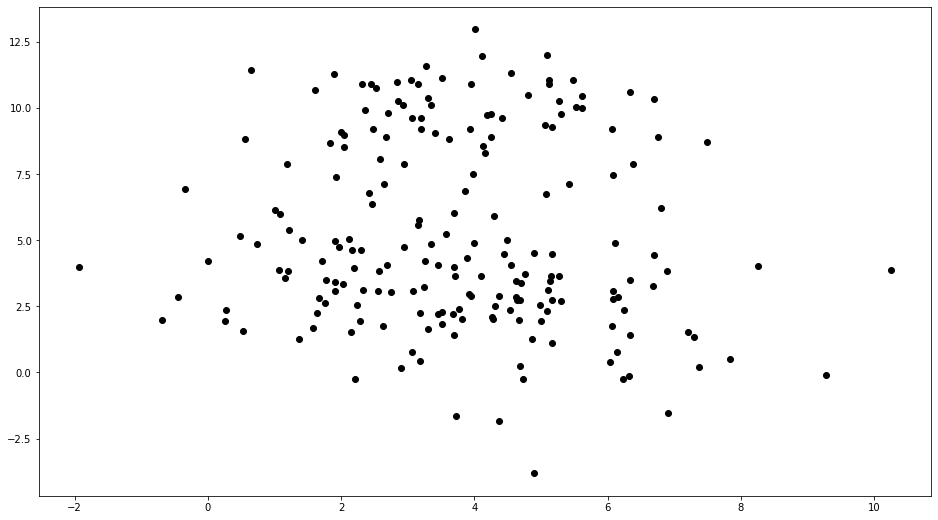

In [3]:
f1 = data[0][:,0] #first column
f2 = data[0][:,1] #second column
X = np.array(list(zip(f1, f2)))
print(X)
plt.rcParams['figure.figsize'] = (16, 9)
plt.scatter(f1, f2, c='black')

#### Euclidean Distance

[[ 0  1]
 [ 2  6]
 [ 0 10]]


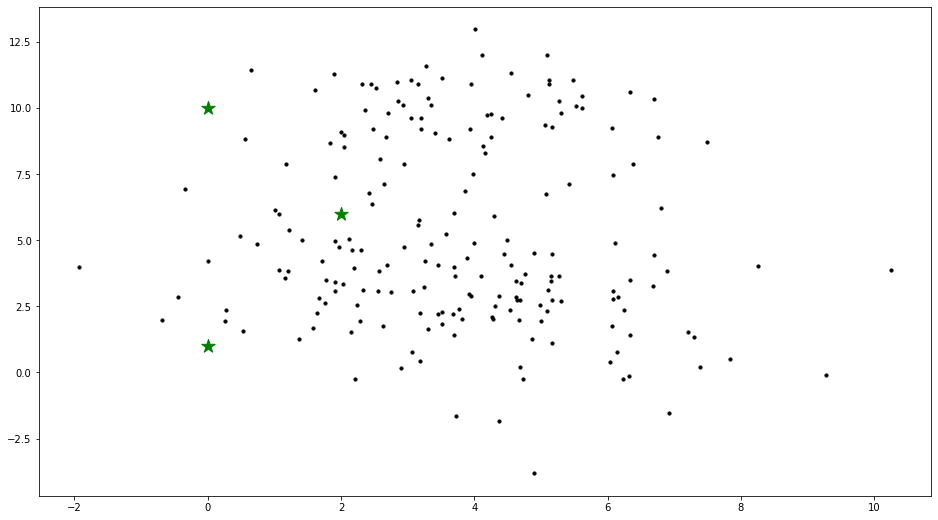

In [4]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)


k = 3

#random centroid
C_x = np.random.randint(0, np.max(X), size=k)
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)))
print(C)
plt.scatter(f1, f2, c='#050505',s=10)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

#### Implementation of kmeans

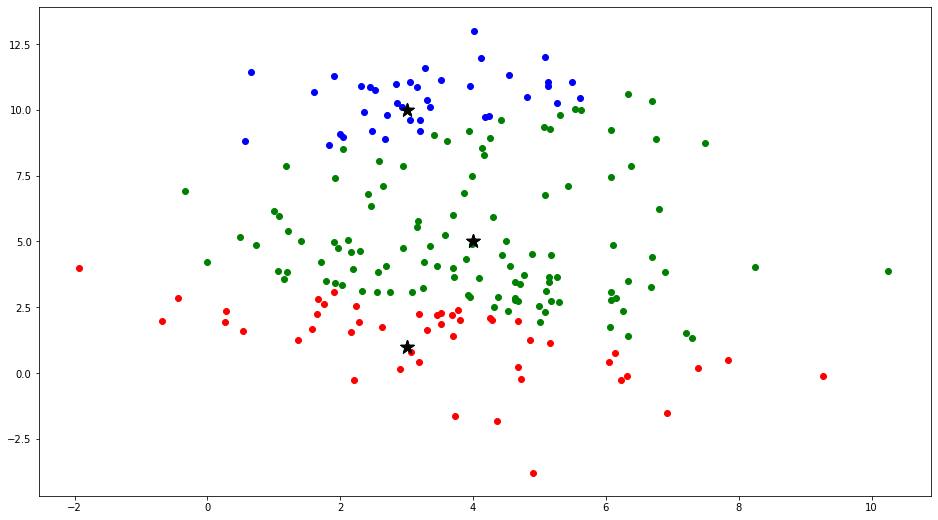

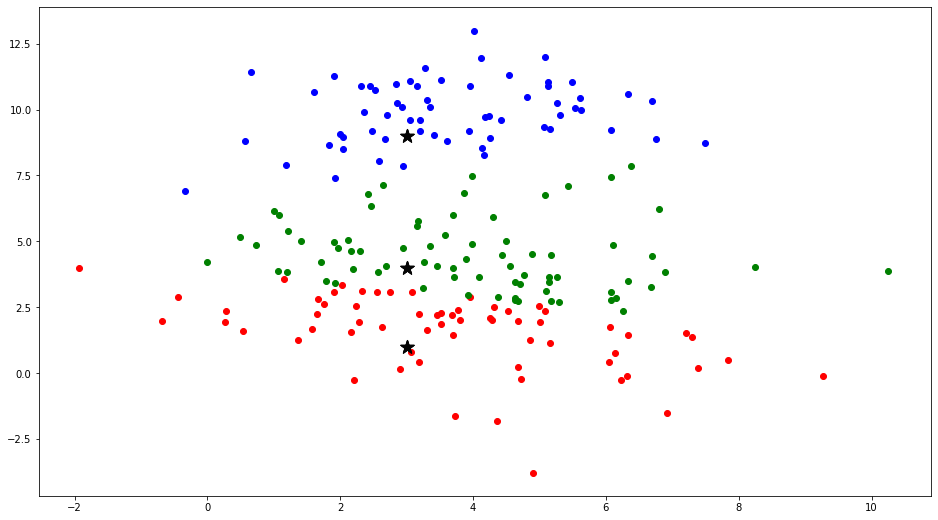

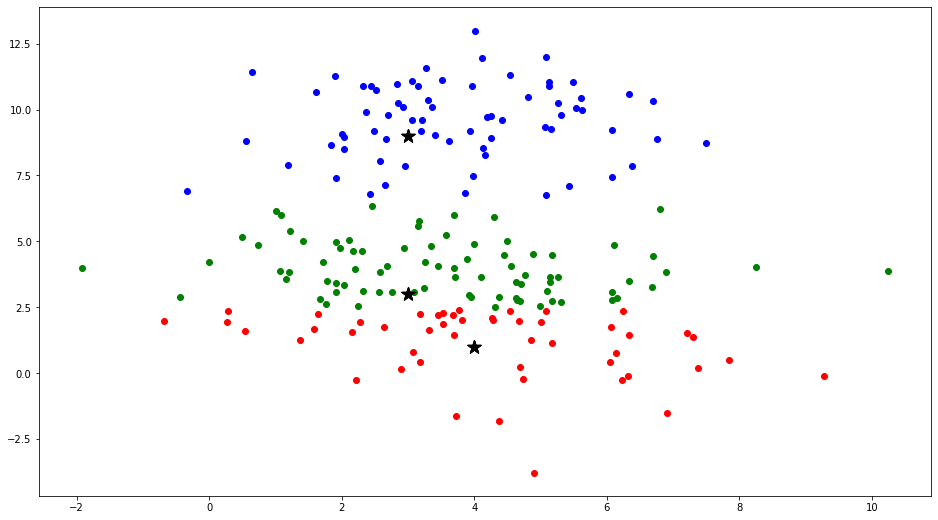

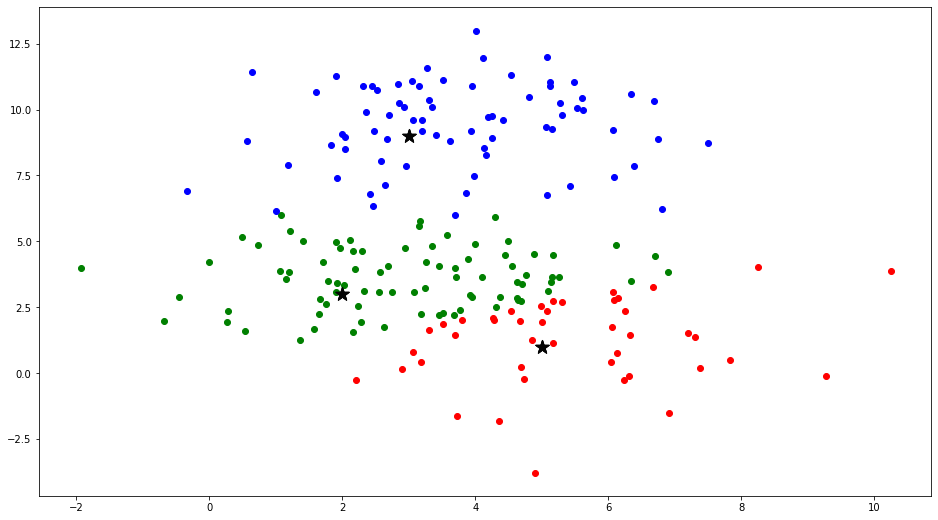

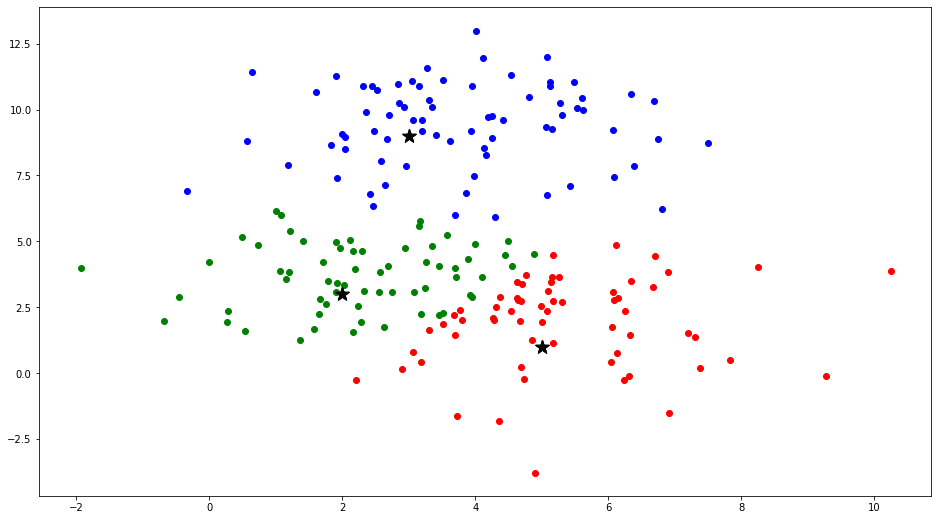

In [5]:
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))


error = dist(C, C_old, None)

while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # keep latest mean
    C_old = deepcopy(C)
    # get new means
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)
    colors = ['r', 'g', 'b']
    fig, ax = plt.subplots()
    
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i])
        ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

### 2. Image Compression

This an application of clustering which consist of compressing image by compressing its colors


/home/khaled/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/home/khaled/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


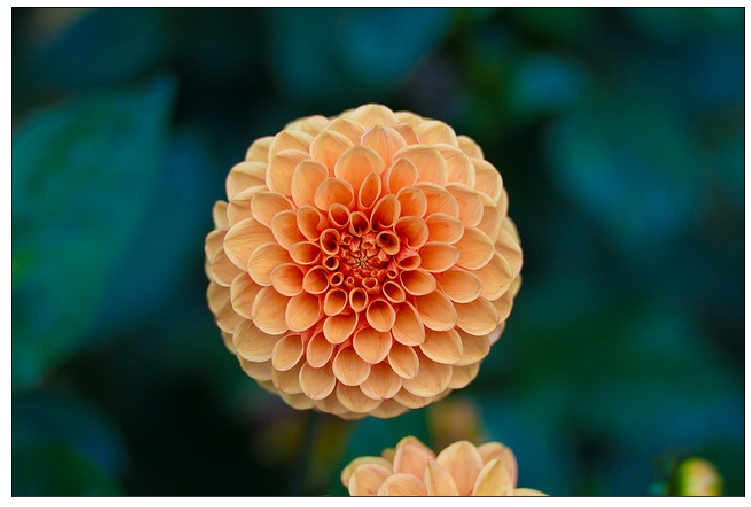

In [6]:

flower = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(flower);


In [7]:
flower.shape
data = flower / 255.0 # scaling data
data = data.reshape(427 * 640, 3)
print(data)


[[0.00784314 0.0745098  0.05098039]
 [0.01176471 0.07058824 0.05098039]
 [0.02745098 0.07843137 0.05098039]
 ...
 [0.02745098 0.18039216 0.10980392]
 [0.03137255 0.17647059 0.10980392]
 [0.03529412 0.16862745 0.10588235]]


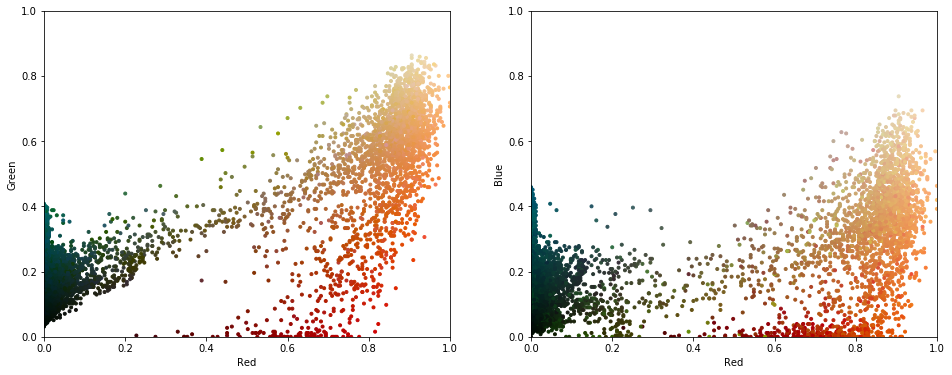

In [8]:
def display(data, colors=None, N=10000):
    if colors is None:
        colors = data
    
    # choose a random subset of N element
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    
display(data)


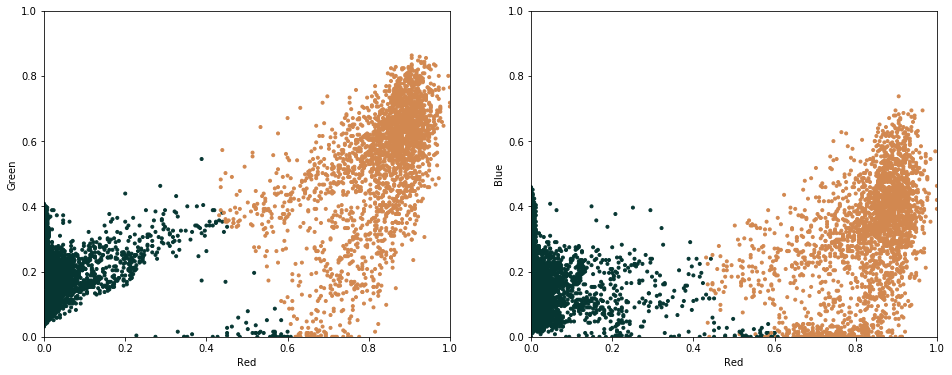

In [9]:


from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

display(data, colors=new_colors)

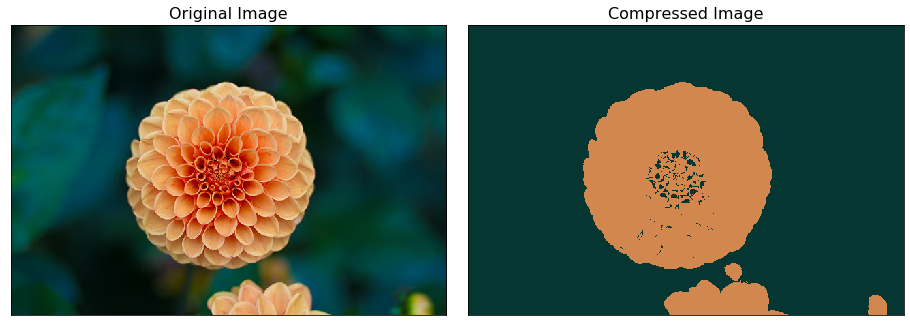

In [10]:
new_flower = new_colors.reshape(flower.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),  subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_flower)
ax[1].set_title('Compressed Image', size=16);

### Conclusion 
There are main keys for clustering like data processing, choosing the right metrics and algorithms